In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pylab 
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [9]:
input_image = cv2.imread('variant-4.jpeg')

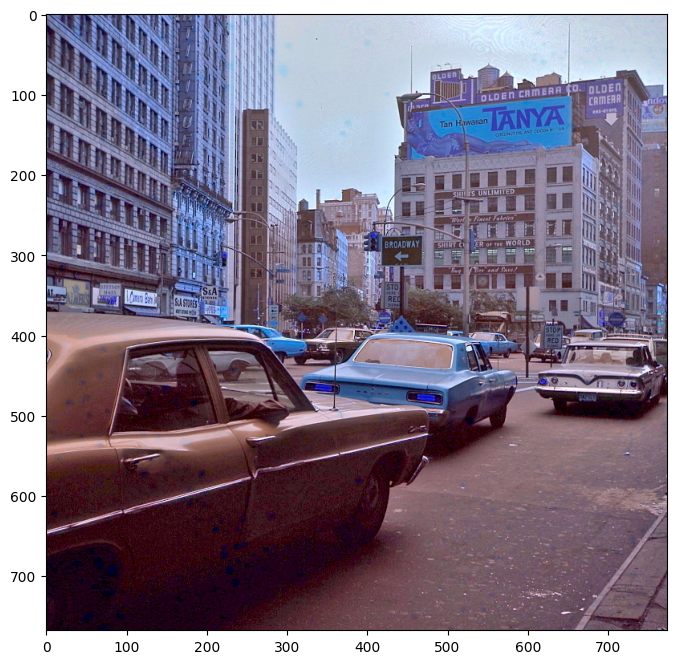

In [10]:
plt.imshow(input_image)

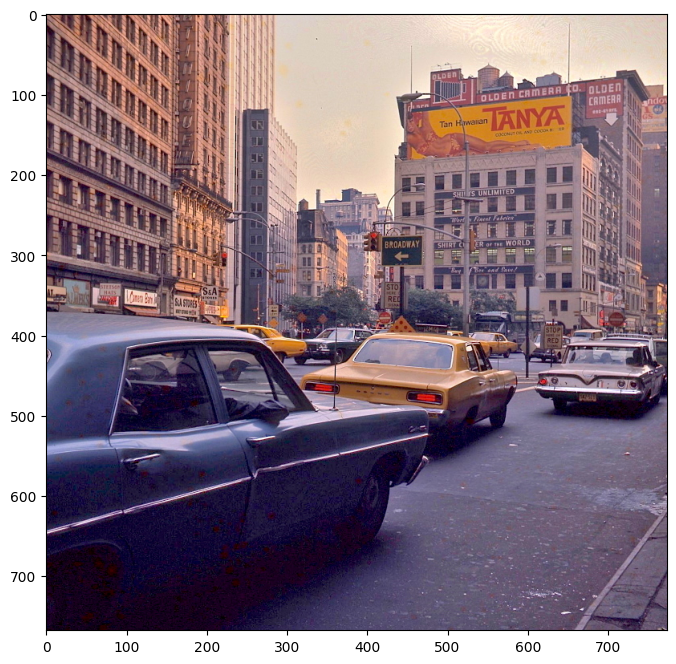

In [ ]:
b, g, r = cv2.split(input_image)
merged = cv2.merge([r, g, b])
plt.imshow(merged)

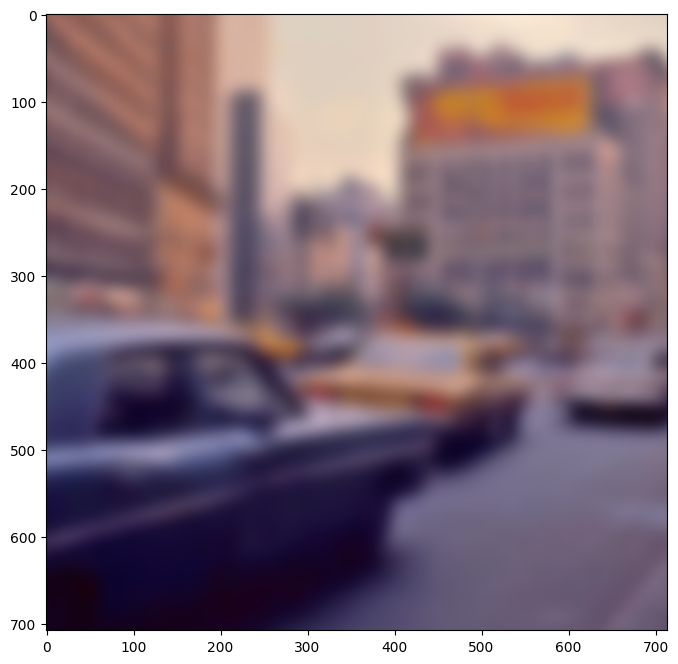

In [102]:
d = 30
img_blur = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d, d:-d]
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))

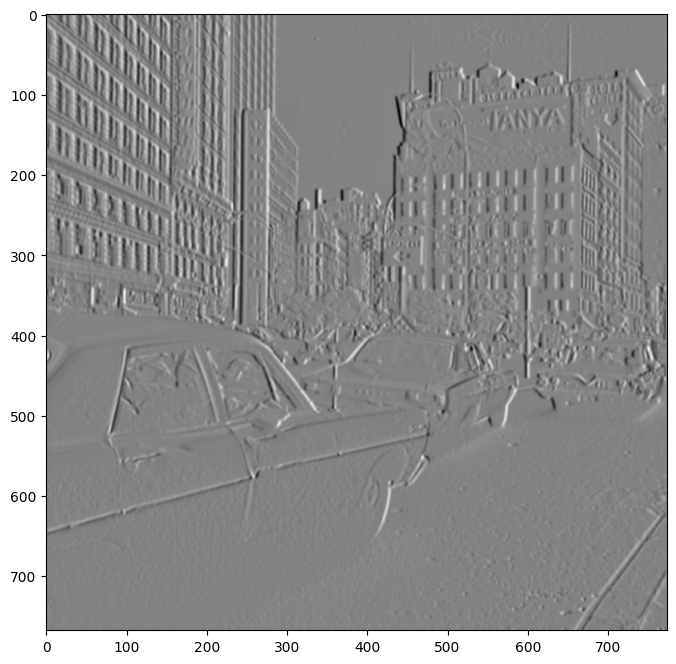

In [103]:
sobelimage = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage, cv2.CV_64F, 1, 0, ksize = 9)
sobely = cv2.Sobel(sobelimage, cv2.CV_64F, 0, 1, ksize = 9)
sobel = cv2.Sobel(sobelimage, cv2.CV_64F, 1, 1, ksize = 9)
# _, img = cv2.threshold(sobelx, 128, 255, cv2.THRESH_BINARY)
# cnts, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# img_cnt = cv2.drawContours(input_image.copy(), cnts, -1, (255, 0, 255), 1)

plt.imshow(sobelx, cmap='gray')
# plt.imshow(img_cnt)

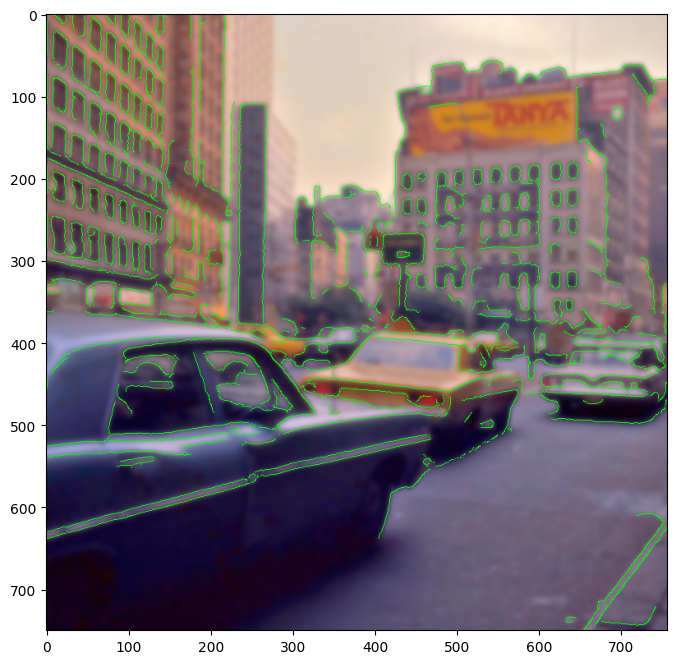

In [108]:
th1 = 20
th2 = 60  # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting
d = 9     # gaussian blur

edgeresult = input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d, d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0)  # this takes pixels in edgeresult where edge non-zero, colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))
# plt.imshow(edge, cmap='gray')

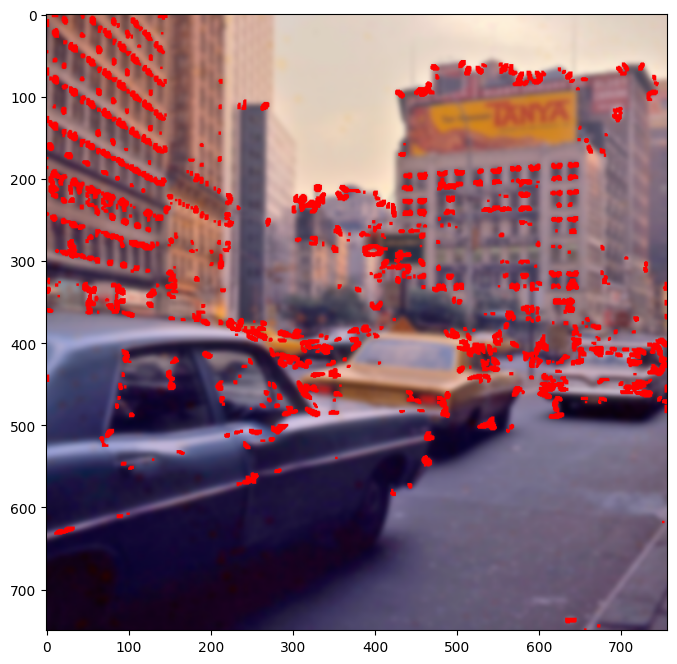

In [117]:
d = 9     # gaussian blur

edgeresult = input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d, d:-d]

harris_test = edgeresult.copy()

# grayscale it
gray = cv2.cvtColor(harris_test, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
blocksize = 4  # 
kernel_size = 1  # sobel kernel: must be odd and fairly small

# run the harris corner detector
dst = cv2.cornerHarris(gray, blocksize, kernel_size, 0.02)  # parameters are blocksize, Sobel parameter and Harris k

# result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst, None)

# we then plot these on the input image for visualisation purposes, using bright red
harris_test[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(harris_test, cv2.COLOR_BGR2RGB))
# plt.imshow(dst, cmap='gray')

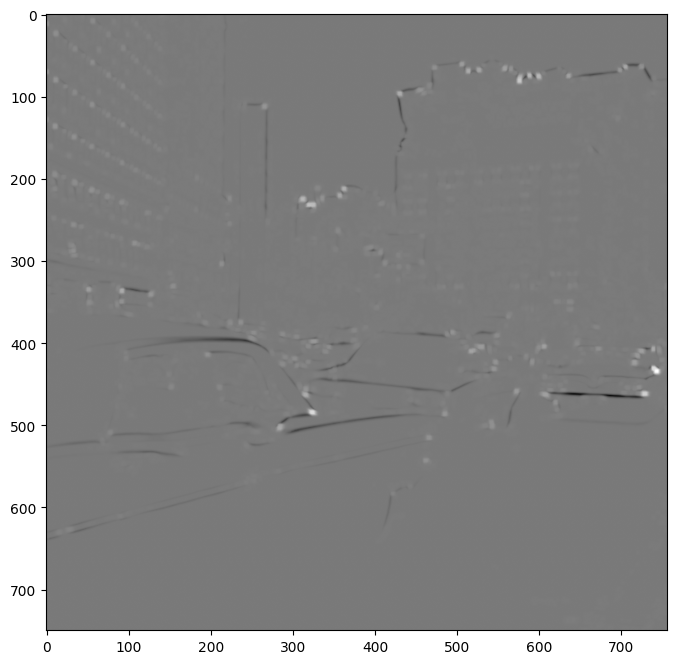

In [118]:
plt.imshow(dst, cmap='gray')

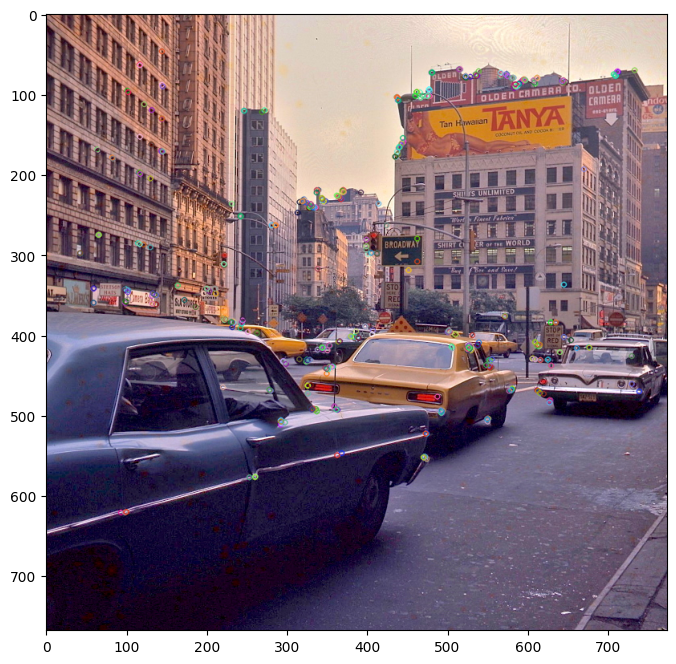

In [119]:
orbimg = input_image.copy()

orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(orbimg, None)

# compute the descriptors with ORB
kp, des = orb.compute(orbimg, kp)

# draw keypoints
cv2.drawKeypoints(orbimg, kp, orbimg)

plt.imshow(cv2.cvtColor(orbimg, cv2.COLOR_BGR2RGB))

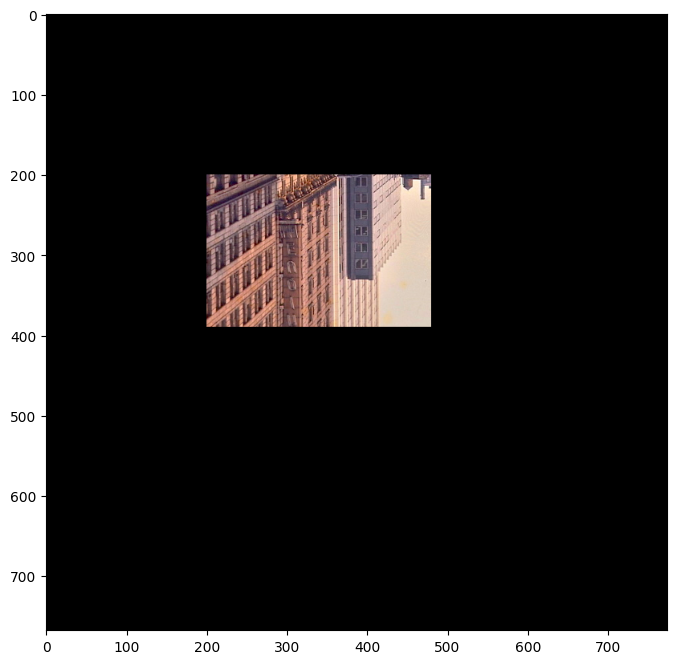

In [123]:
img2match = np.zeros(input_image.shape, np.uint8)

dogface = input_image[60:250, 70:350]  # copy out a bit
# img2match[60:250, 70:350] = [0, 0, 0]  # blank that region

# plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

dogface = cv2.flip(dogface, 0)  # flip the copy

img2match[200:200+dogface.shape[0], 200:200+dogface.shape[1]] = dogface  # paste it back somewhere else

plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

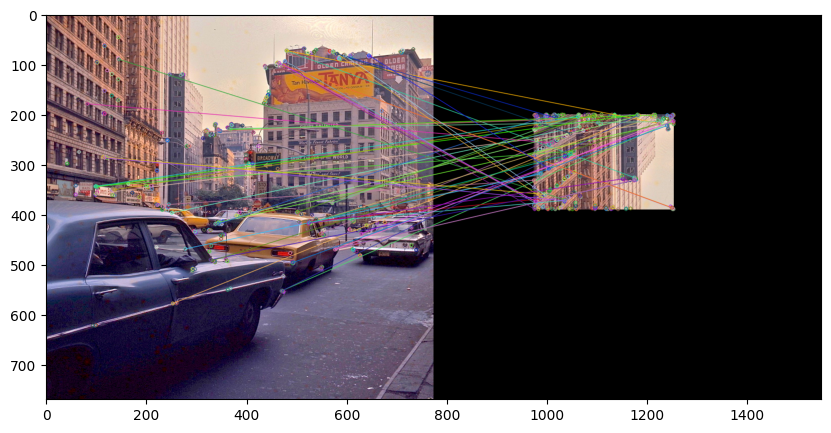

In [124]:
kp2 = orb.detect(img2match, None)

# compute the descriptors with ORB
kp2, des2 = orb.compute(img2match, kp2)

# create BFMatcher object: this is a Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des, des2)

# Sort them by distance between matches in feature space - so the best matches are first
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 50 matches
oimg = cv2.drawMatches(orbimg, kp, img2match, kp2, matches[:50], orbimg)

plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))